In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dataCollection import *

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
OC = 'NGC_6791'

In [3]:
#step0: match apogee data with gaia data
#apogee_Teff = matchApogeeGaia('k2')

#step 1: get members in gaia IDs and write a simbad input file
gaia_IDs, member_df = genSimbad(OC, "{}/{}_simbad_input.txt".format(OC,OC))

#step 2: astroquery for gaia Gband mags, luminosities and distances, then tm_IDs
gaia_df = GAIA_query(gaia_IDs)
gaia_df = GAIA_query_tm(gaia_df, gaia_IDs)

#step 3: merging apogee_gaia df with gaia_df
step3_df = matchApogeeToData(gaia_df)

There is 1722 stars in the membership paper.
Simbad input txt file saved as "NGC_6791/NGC_6791_simbad_input.txt".
Launching GAIA query...


Obtained 1722 out of 1722 stars in the cluster.
Launching GAIA query...


1472 out of 1722 stars in the cluster have cross match 2MASS IDs.
Matching APOGEE Teffs to queried GAIA stars
Found 36 matching stars with APOGEE Teff data.


In [4]:
#step 4: read simbad output file and combine it to step3_df
step4_df = readSimbad(f'{OC}/{OC}_simbad_output.txt',step3_df)

#step 5: matching back in ra, dec and membership prob from membership paper, and apply membership cut for total membership>99%
step5_df = membershipCut(step4_df, member_df)

#step 6: Teff selection: 1.apogee, 2.singulars, 3.take away problematics, 
# 4.apply most widespread source of Teff until all multiples have Teff, 5.manual picking of problematics
assigned_df, problematic_df, final_ranks = assignTeff(step5_df)
final_ranks

Reading SIMBAD output and merging it to GAIA+APOGEE data...
found 1722 matching IDs
125 stars have Teff data
Found Teff for 126 stars between SIMBAD and APOGEE.
Matching in membership data and applying membership cut...
125/126 stars are taken as cluster members
Using APOGEE Teff for 36 stars.
There are 68 stars without APOGEE data and have Teff provided by only one paper.
Picking Teff automatically for 11 stars, 10 stars require manual picking.


C:\Users\User\Documents\UoB physics stuff\year 4\FYP\Simbad\dataCollection.py:310: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Teff'][i] = paper[0]
C:\Users\User\Documents\UoB physics stuff\year 4\FYP\Simbad\dataCollection.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ref'][i] = paper[2]


,ref,count
0,2011AJ....141...89S,41.0
1,2018ApJS...236..42Y,19.0
2,2018ApJ...867...34V,9.0
3,2011ApJ...729L..10B,5.0
4,2016A&A...594A..39F,3.0
5,2011AJ....141...50W,2.0


In [5]:
#manual assigning of problematic Teffs
problematic_df = replaceManual(problematic_df, final_ranks)
step6_df = pd.concat([assigned_df,problematic_df])
step6_df.sort_index(inplace=True)

Star 1/10, GAIA ID: 2051099329142406400
0: 4638.0 2018ApJS...236..42Y 19 entries
1: 4440.0 2011ApJ...729L..10B 5 entries
Teff choice?0


C:\Users\User\Documents\UoB physics stuff\year 4\FYP\Simbad\dataCollection.py:341: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Teff'][i] = Teff[decision_index]
C:\Users\User\Documents\UoB physics stuff\year 4\FYP\Simbad\dataCollection.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ref'][i] = ref[decision_index]



Star 2/10, GAIA ID: 2051105135938218624
0: 4263.0 2018ApJS...236..42Y 19 entries
1: 4481.0 2011AJ....141...89S 41 entries
Teff choice?1

Star 3/10, GAIA ID: 2051105479535690240
0: 4724.0 2018ApJS...236..42Y 19 entries
1: 4543.0 2011ApJ...729L..10B 5 entries
Teff choice?0

Star 4/10, GAIA ID: 2051105754413593728
0: 4784.0 2018ApJS...236..42Y 19 entries
1: 4602.0 2011ApJ...729L..10B 5 entries
Teff choice?0

Star 5/10, GAIA ID: 2051288204622141568
0: 4550.0 2018ApJS...236..42Y 19 entries
1: 4365.0 2011ApJ...729L..10B 5 entries
Teff choice?0

Star 6/10, GAIA ID: 2051292911906095360
0: 4735.0 2018ApJS...236..42Y 19 entries
1: 4452.0 2011ApJ...729L..10B 5 entries
Teff choice?0

Star 7/10, GAIA ID: 2051293083704792960
0: 4095.0 2018ApJ...867...34V 9 entries
1: 4351.0 2018ApJS...236..42Y 19 entries
2: 4186.0 2011ApJ...729L..10B 5 entries
Teff choice?2

Star 8/10, GAIA ID: 2051293255503469184
0: 4755.0 2018ApJS...236..42Y 19 entries
1: 4478.0 2011AJ....141...89S 41 entries
Teff choice?1

Star 

In [6]:
#listing all papers to google
countUniqueRefs(step6_df, column='ref')

,ref,count
0,2011AJ....141...89S,44.0
1,apogee,36.0
2,2018ApJS...236..42Y,25.0
3,2018ApJ...867...34V,9.0
4,2011ApJ...729L..10B,6.0
5,2016A&A...594A..39F,3.0
6,2011AJ....141...50W,2.0


In [7]:
#Matching Teff errors from papers:
resulting_df = matchTeff_err(step6_df, '2011AJ....141...89S', OC+'/2011AJ....141...89S_Teff.txt',3,4,7,8)
resulting_df = matchTeff_err(resulting_df, '2018ApJS...236..42Y', OC+'/2018ApJS...236..42Y_Teff1.txt',20,21,1,2)
resulting_df = fixedTeff_err(resulting_df, '2018ApJ...867...34V', 50)
resulting_df = fixedTeff_err(resulting_df, '2011ApJ...729L..10B', 100)
resulting_df = matchTeff_err(resulting_df, '2016A&A...594A..39F', OC+'/2016AA...594A..39F_Teff.txt',4,5,7,8)
#resulting_df = fixedTeff_err(resulting_df, '2016A&A...594A..43H', 80)
#stars will be removed as RGB later on, using a place holder Teff err due to unable to locate errors
step7_df = fixedTeff_err(resulting_df, '2011AJ....141...50W', 80)

C:\Users\User\Documents\UoB physics stuff\year 4\FYP\Simbad\dataCollection.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Teff_err'][i]=Teff_err[j]
C:\Users\User\Documents\UoB physics stuff\year 4\FYP\Simbad\dataCollection.py:503: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Teff_err'][i] = list(suspect_df['Teff_err'])[np.argmin(angular_dist)]
C:\Users\User\Documents\UoB physics stuff\year 4\FYP\Simbad\dataCollection.py:521: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [8]:
ra_dec_conv('19 20 53.0','+37 46 18')

290.22083333333336 37.77166666666667


In [9]:
dist = step7_df['distance']
dist = dist[np.logical_not(np.isnan(dist))]
dist_err = step7_df['distance_err']
dist_err = dist_err[np.logical_not(np.isnan(dist_err))]
mean_dist = np.sum(dist*dist_err**(-2))/np.sum(dist_err**(-2))
mean_dist_err = np.sqrt(1/np.sum(dist_err**(-2)))
print(mean_dist_err)
#mean_dist_err=0
luminosity, luminosity_err = lum_calc(OC, step7_df['g_mag'], step7_df['g_mag_err'], mean_dist, mean_dist_err, list(step7_df['Teff']), list(step7_df['Teff_err']))
step8_df = step7_df.copy()
step8_df['cal_lum'] = luminosity
step8_df['cal_lum_err'] = luminosity_err
step8_df.dropna(subset=['cal_lum'],inplace=True)

52.50852569678626
Invalid temperature 3115.0. BC has been set to Nan


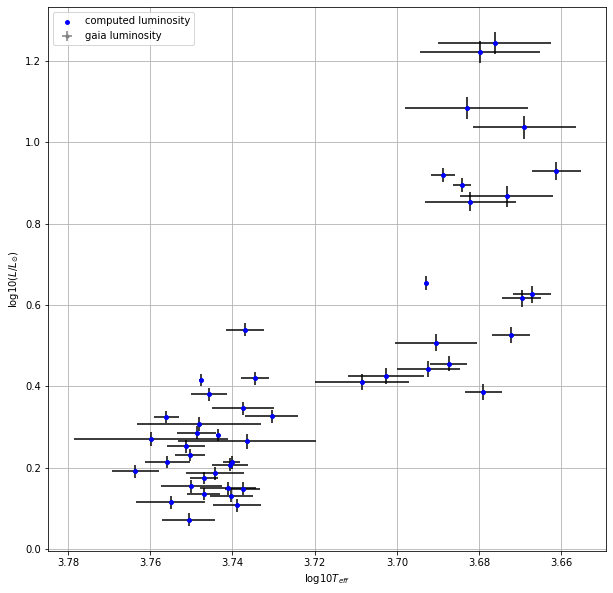

In [10]:
#apply cut that removes RGB stars
step8_df['value'] = 10*np.log10(step8_df['Teff'])-np.log10(step8_df['cal_lum'])-35.5
cut_df = step8_df[step8_df['value']>0].copy()

#plotting cluster to count number of blue stragglers, and other stars to remove
plotCluster(cut_df, plot_gaia=True)

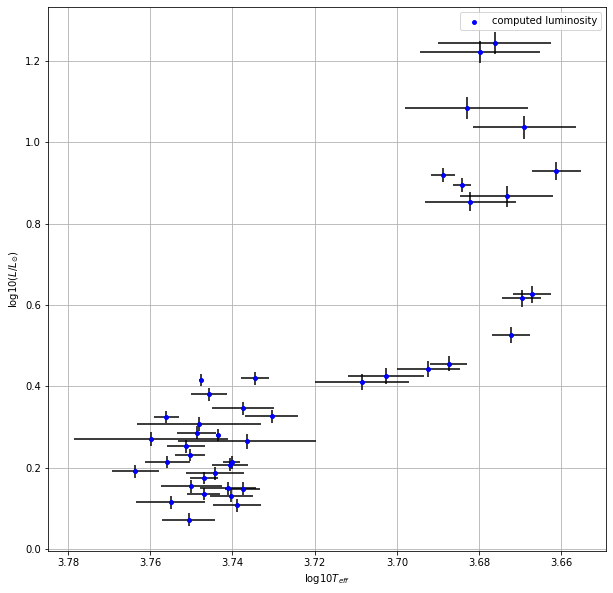

In [11]:
#removing blue stragglers
#no blue stragglers
step9_df = cut_df.copy()

#removing other weird stars
step9_df = removeStars(step9_df, 3.74, 0.6,1)
step9_df = removeStars(step9_df, 3.70, 0.7,1)
step9_df = removeStars(step9_df, 3.68, 0.4,1)
step9_df = removeStars(step9_df, 3.69, 0.55,1)

plotCluster(step9_df, plot_gaia=False, plot_train=False, grid_path='grid2_early.csv')

In [12]:
#save data to csv
step9_df.to_csv(f'{OC}/{OC}_final.csv',index=False)